# MNIST data
**This notebook: [see on github](https://github.com/drinkingkazu/kmi/blob/master/Lec.3_MNIST.ipynb) or [run it on google colab](https://colab.research.google.com/github/drinkingkazu/kmi/blob/master/Lec.3_MNIST.ipynb)**.

MNIST is widely used for an introductory machine learning (ML) courses/lectures. Most, if not all, ML libraries provide an easy way (API) to access MNIST and many publicly available dataset. This is true in `pytorch` as well. MNIST dataset in `Dataset` instance is available from `torchvision`. 

## Goals
* Get familiar with MNIST dataset
* Learn about DataLoader

As usual we start with our codebase download:

In [1]:
![ -d kmi ] || git clone https://github.com/drinkingkazu/kmi
! cd kmi && git pull

Already up to date.


... followed by imports

In [2]:
import torch
import numpy as np

## Creating MNIST Dataset
A `torchvision` is a supporting module that has many image-related APIs including an interface (and management) of MNIST dataset. Let's see how we can construct:

In [3]:
from torchvision import datasets, transforms
# Data file download directory
LOCAL_DATA_DIR = './mnist-data'
# Use prepared data handler from pytorch (torchvision)
dataset = datasets.MNIST(LOCAL_DATA_DIR, train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

Here, MNIST is also a type `Dataset` (how? through class inheritance). All torch `Dataset` instance have tow useful and common functions: the length representations and data element access via index.

In [4]:
print( len(dataset)  )
print( type(dataset[0]) )

60000
<class 'tuple'>


That being said, how each data element is presented depends on a particular `Dataset` implementation. In case of MNIST, it is a tuple of length 2: **data** and **label**.

Type of data  : <class 'torch.Tensor'> shape torch.Size([1, 28, 28])
Type of label : <class 'int'> value 5


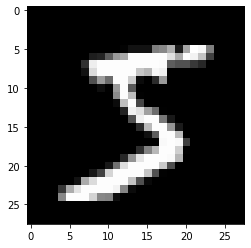

In [5]:
ENTRY=0
data, label = dataset[ENTRY]
print('Type of data  :', type(data),  'shape', data.shape)
print('Type of label :', type(label), 'value', label)

import matplotlib.pyplot as plt
%matplotlib inline

# Draw data
data = data.view(data.shape[1:])
plt.imshow(data,cmap='gray')
plt.show()

## Creating DataLoader
In the next notebook, we will try a logistic regression using stochastic gradient descent method. For this, we need a capability to randomly select a subset of dataset many times. This part is important: we want to maximize the time spent for training, not reading data and making it available for training.  

Pytorch (and almost all ML libraries) provides a utility to do this so that you don't have to reinvent. This is called `DataLoader`, and here is how you can create.

In [6]:
from kmi.iotools.collates import MNISTCollate

loader = torch.utils.data.DataLoader(dataset,
                                     collate_fn=MNISTCollate,
                                     batch_size=20,
                                     shuffle=True,
                                     num_workers=1,
                                     pin_memory=True)


#### Details (ignore if wished): `DataLoader` constructor arguments
The first argument is you dataset, and it can be anything but requires two attributes: [`__len__`](https://docs.python.org/3/reference/datamodel.html#object.__len__) and [`__getitem__`](https://docs.python.org/3/reference/datamodel.html#object.__getitem__). In case you wonder, these attributes allow you to call `len(dataset)` and access dataset elements  by `dataset[X]` where `X` is an index integer.

The other constructor arguments used above are:
* `batch_size` ... the same of the subset data to be provided at once
* `shuffle` ... whether or not to randomize the choice of subset dataset (False will provide dataset
* `num_workers` ... number of parallel data-reader processes to be run (for making data read faster using `multiprocessing` module)
* `pin_memory` ... speed up data transfer to GPU by avoiding a necessiry to copy data from pageable memory to page-locked (pinned) memory. Read [here](https://devblogs.nvidia.com/how-optimize-data-transfers-cuda-cc/) for more details. If you are not sure about the details, set to `True` when using GPU. 

## Data streaming with `DataLoader`
So let's play with it! First of all, it has the concept of "length".

In [7]:
print('length of DataLoader:',len(loader))
print('By the way, batch size * length =', 20 * len(loader))

length of DataLoader: 3000
By the way, batch size * length = 60000


We know the data total statistics is 60,000 which coincides with the length of `DataLoader` instance and the batch size where the latter is the unit of batch data. **Yep, as you guessed**, `DataLoader` is iterable: 

In [15]:
# Create an iterator for playin in this notebook
from itertools import cycle
iter = cycle(loader)

for i in range(10):
    batch = next(iter)    
    print('Iteration',i)
    print(batch['label'])

Iteration 0
tensor([8, 4, 3, 5, 9, 7, 3, 2, 2, 8, 8, 2, 2, 9, 0, 5, 0, 7, 9, 9])
Iteration 1
tensor([0, 7, 3, 8, 3, 3, 1, 5, 5, 0, 6, 8, 7, 0, 2, 9, 4, 0, 7, 2])
Iteration 2
tensor([5, 9, 0, 7, 3, 7, 8, 6, 3, 8, 7, 6, 9, 3, 1, 4, 3, 4, 8, 1])
Iteration 3
tensor([0, 4, 7, 0, 3, 6, 0, 1, 9, 0, 7, 0, 9, 0, 9, 0, 3, 2, 5, 9])
Iteration 4
tensor([6, 1, 1, 2, 9, 9, 4, 4, 0, 8, 1, 8, 5, 8, 3, 5, 1, 5, 0, 0])
Iteration 5
tensor([4, 2, 1, 4, 5, 0, 1, 2, 7, 8, 7, 1, 7, 2, 1, 1, 9, 2, 9, 8])
Iteration 6
tensor([0, 9, 5, 2, 5, 0, 1, 8, 3, 1, 9, 5, 4, 5, 4, 5, 7, 3, 5, 6])
Iteration 7
tensor([8, 8, 7, 3, 8, 1, 9, 1, 1, 7, 1, 5, 4, 2, 0, 7, 2, 6, 2, 2])
Iteration 8
tensor([6, 6, 0, 1, 8, 7, 9, 8, 4, 5, 1, 1, 7, 5, 1, 4, 7, 7, 0, 7])
Iteration 9
tensor([0, 8, 0, 1, 7, 8, 2, 6, 1, 2, 8, 8, 2, 6, 9, 6, 8, 1, 7, 0])


... and this is how `data` looks like:

In [16]:
print('Shape of an image batch data',batch['data'].shape)

Shape of an image batch data torch.Size([20, 28, 28])


... which is quite naturally 20 of 28x28 image